In [2]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

from tabulate import tabulate
import pandas as pd
import numpy as np


INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


In [3]:
# Object numbers 
# consider scaling with depth
# it affect number of objects and therefore number of forced objects
# object number per exposure
# 1 year will have 3.5 more objects than single visit
# 2 year will have 5 times more objects than single visit
# 3 year depth will have 6 times more objects than single visit
# 10 year will have 8 times more objects than single visit


# assume slope a of 0.32; this gives 8 times more objects in 10 years
print((825/6)**0.42)
def n_obj_from_single(n):
    return (n/6)**0.42

7.908372790929259


In [ ]:
# Consideration of current status and sizes of Objects

# DP1 had 1786*9 detector_visits

# DP1 object table has 2.3*10.6 objects and 268 million forcedsources 
# so 2.3 million objects, with 100 observations per object 

# 2.3 million objects, it takes 715 MB in DP1
# 1 billion objects, it would take 300 GB

# 268 million forcedsources it takes 7.2GB in DP1   
# 1B forcedsources it would take 27 GB

In [ ]:
# Consideration of current status and sizes of diaObjects

# DP1 diaobject has 1 million diaObjects, with 197 million diaForced
# 1 million in 1786*9 detectorvisits leads that 
# in DP1 we had 60 diaSources per detector visit 

# 33 MB for 1 million diaObjects in DP1,  5.9 GB for 200 million diaForced in DP1

# 1 billion diaObjects would take 33 GB
# 1 billion diaForcedObjects would take 30 GB  

In [6]:
# Special consideration for Data Preview 2 

# DP2 100 degree with 1650 exposures + 1800 degrees with 83*2*4/6
nr_deep_DP2 = 40*(100/18000)*n_obj_from_single(1650)/n_obj_from_single(825)
nr_wide_DP2 = 40*(1800/18000)*n_obj_from_single(166)/n_obj_from_single(825)
# that leads to 0.3 billion objects with 1650 + 2 billion objects with 100 
# average is 300 observations


# number of exposures 
# DP2 starts April 15, ends September 01
# DP2 assume to have scientific observing of 30 days of 10 hours, 30 of 8 hours, 30 days of 6 hours, 30 days of 4 hours, 15 days of 2 hours
# all togehter like having 87 full nights (10 hours per night)
# cloud fraction = 0.25
# 87 * 0.75 = 65 full nights of data
# nr_of_exposures = 900*65= 58500 
# nr_of_det_visits = 900*65*189 = 11056500

# nr of exposures when computed from coverage. 
# To have 1650 visits over 100 degrees, we need 1650*11 exposures
# To have 100 visits over 1800 degrees, we need 200*100 exposures
# 1650*11 + 200*100 = 36500

# close enough

In [7]:
# number of visits to cover it once
19600/9.6 
# number of visits to cover it 1 year 
19600/9.6 * 82.5 *1.5

252656.25

In [8]:
sky_size = np.array([1/2, 1, 1, 1, 1,1,1,1,1,1,1])
# number of detector_visits 
array_of_nr_detvisits = 900*366*189*0.75*sky_size*np.array([1, 1, 2, 3, 4,5,6,7,8,9,10])
nr_detvisits_DP2 = (11*2000+200*100)*189
array_of_nr_detvisits = np.insert(array_of_nr_detvisits, 0, nr_detvisits_DP2)

# number of exposures per release
array_of_nr_exp = array_of_nr_detvisits /189

array_of_nr_exp

array([  42000.,  123525.,  247050.,  494100.,  741150.,  988200.,
       1235250., 1482300., 1729350., 1976400., 2223450., 2470500.])

In [52]:
# Objects

# how big is billion Objects in TB
bil_obj = 300/1024
bil_force_obj = 27/1024
# number of objects given the number of exposures 
nr_obj = n_obj_from_single(83) * (17/3.5) 
nr_obj_DP2 = nr_wide_DP2 + nr_deep_DP2


list_of_nr_obj = []
list_of_size_obj = []
# size of object catalog

for i in range(1,12):
    if i ==1:
        list_of_nr_obj.append(sky_size[i-1] * i * n_obj_from_single(83*i) * (16/3.5) )
    else:
        list_of_nr_obj.append(sky_size[i-1] * n_obj_from_single(83*(i-1)) * (16/3.5)  )

array_of_nr_obj = np.array(list_of_nr_obj)
array_of_nr_obj = np.insert(array_of_nr_obj, 0, nr_obj_DP2)
array_of_size_obj = array_of_nr_obj * bil_obj 
print("array_of_nr_obj (billion):" + str(array_of_nr_obj))
print("array_of_size_obj (TB):" + str(array_of_size_obj))

# number of exposures per field 
# 7% of the field will be covered 10x more, effectivly 1.5 more lightcurves
nr_exp = np.array([300, 83*1.5, 83*1.5, 166*1.5, 250*1.5, 333*1.5, 416*1.5, 500*1.5, 583*1.5, 666*1.5, 750*1.5, 825*1.5])

array_of_nr_lc_obj = array_of_nr_obj * nr_exp
# size in TB 
# 7.5 TB per 100 observations, per billion objects 
array_of_size_lc_obj = array_of_nr_lc_obj * bil_force_obj

print("array_of_size_lc_obj (TB):" + str(array_of_size_lc_obj))


array_of_nr_obj (billion):[ 2.33715078  6.88987299 13.77974599 18.43630185 21.85909306 24.66643626
 27.08997559 29.24588292 31.20199686 33.00190475 34.67552666 36.24442481]
array_of_size_obj (TB):[ 0.68471214  2.01851748  4.03703496  5.40126031  6.40403117  7.226495
  7.93651629  8.56812976  9.14121002  9.66852678 10.1588457  10.61848383]
array_of_size_lc_obj (TB):[  18.48722786   22.61748835   45.23497669  121.04224352  216.13605195
  324.86708262  445.71475469  578.34875899  719.45893433  869.29724295
 1028.58312711 1182.63363653]


In [53]:
# size for billion diaObjects in TB
bil_diaobj = 33/1024
bil_force_diaobj = 30/1024

nr_diaSrc_per_detvisit = 30
# number of diaObjects, in billions given the number of exposures 
array_of_nr_diaobj = array_of_nr_detvisits* nr_diaSrc_per_detvisit /10**9
array_of_size_diaobj = array_of_nr_diaobj * bil_diaobj

print("nr_diaobj (billion):" + str(array_of_nr_diaobj))
print("size_diaobj (TB):" + str(array_of_size_diaobj))

# 197 observations is 179 times larger, lets assume that it is exactly the same
# 1 billion diaObjects with 100 observations would take 3TB
array_of_nr_lc_diaobj = array_of_nr_diaobj * nr_exp
# in TB
# 3TB per 100 observations, per billion 
array_of_size_lc_diaobj = array_of_nr_lc_diaobj * 3/100 
print("size_lc_diaobj (TB):" + str(array_of_size_lc_diaobj))

nr_diaobj (billion):[ 0.23814     0.70038675  1.4007735   2.801547    4.2023205   5.603094
  7.0038675   8.404641    9.8054145  11.206188   12.6069615  14.007735  ]
size_diaobj (TB):[0.00767443 0.02257106 0.04514211 0.09028423 0.13542634 0.18056846
 0.22571057 0.27085269 0.3159948  0.36113692 0.40627903 0.45142115]
size_lc_diaobj (TB):[  2.14326      2.61594451   5.23188902  20.92755609  47.27610562
  83.96236359 131.1123996  189.1044225  257.24504941 335.84945436
 425.48495063 520.03716188]


In [54]:
# number of sources 
nr_single_exp = 45564446.0/(1789*9)
array_of_nr_src = array_of_nr_detvisits * nr_single_exp / 10**9
print("nr_sources (billion):" + str(array_of_nr_src))
# size sources
array_of_size_src =array_of_nr_detvisits/(1789*9) * 0.016
print("size_sources (TB):" + str(array_of_size_src))

nr_sources (billion):[  22.46385767   66.06780997  132.13561994  264.27123988  396.40685982
  528.54247975  660.67809969  792.81371963  924.94933957 1057.08495951
 1189.22057945 1321.35619939]
size_sources (TB):[  7.8882057   23.19977641  46.39955282  92.79910565 139.19865847
 185.59821129 231.99776411 278.39731694 324.79686976 371.19642258
 417.59597541 463.99552823]


In [ ]:
# option A - compression factor 0.7, reduce size of everything by 0.8
# baseline - diaObjects go to 30 
# C - baseline with objects 10x larger
# D - baseline with sources added
# E - baseline with diA sources stay at 60
import numpy as np

baseline = array_of_size_lc_obj + array_of_size_lc_diaobj + array_of_size_obj + array_of_size_diaobj
option_A = baseline *0.7*0.8 - baseline  
baseline
option_C = 12.7*array_of_size_obj
option_D = array_of_size_src
option_E = array_of_size_lc_diaobj



In [56]:
# Release labels
releases = ["DP2"] + [f"DR{i}" for i in range(1, 12)]

# Compute options
option_A = baseline * 0.7 * 0.8 - baseline
option_C = 12.7 * array_of_size_obj
option_D = array_of_size_src
option_E = array_of_size_lc_diaobj

# Define helper functions (integer rounding)
def format_plus(x):
    return f"+{int(round(x))} TB"

def format_minus(x):
    return f"{int(round(x))} TB"

# Build DataFrame with string-formatting applied early
df = pd.DataFrame({
    "Release": releases,
    "A - min version": [format_minus(x) for x in option_A],
    "Baseline": [f"{int(round(x))} TB" for x in baseline],
    "C - full obj": [format_plus(x) for x in option_C],
    "D - add src": [format_plus(x) for x in option_D],
    "E - many diaSrc": [format_plus(x) for x in option_E]
})

# Print markdown table
print(tabulate(df, headers='keys', tablefmt='github', showindex=False))

| Release   | A - min version   | Baseline   | C - full obj   | D - add src   | E - many diaSrc   |
|-----------|-------------------|------------|----------------|---------------|-------------------|
| DP2       | -9 TB             | 21 TB      | +9 TB          | +8 TB         | +2 TB             |
| DR1       | -12 TB            | 27 TB      | +26 TB         | +23 TB        | +3 TB             |
| DR2       | -24 TB            | 55 TB      | +51 TB         | +46 TB        | +5 TB             |
| DR3       | -65 TB            | 147 TB     | +69 TB         | +93 TB        | +21 TB            |
| DR4       | -119 TB           | 270 TB     | +81 TB         | +139 TB       | +47 TB            |
| DR5       | -183 TB           | 416 TB     | +92 TB         | +186 TB       | +84 TB            |
| DR6       | -257 TB           | 585 TB     | +101 TB        | +232 TB       | +131 TB           |
| DR7       | -342 TB           | 776 TB     | +109 TB        | +278 TB       | +189 TB           |


In [15]:
# Helper with + sign
def format_plus(x):
    return f"{x:.2f}"

# Sum of all components
total_size = (
    array_of_size_obj +
    array_of_size_diaobj +
    array_of_size_lc_obj +
    array_of_size_lc_diaobj
)

# Create DataFrame with all components
df_components = pd.DataFrame({
    "Release": releases,
    "Baseline (TB)": np.round(baseline, 2),
    "Size Obj (TB)": [format_plus(x) for x in array_of_size_obj],
    "Size DiaObj (TB)": [format_plus(x) for x in array_of_size_diaobj],
    "Size LC Obj (TB)": [format_plus(x) for x in array_of_size_lc_obj],
    "Size LC DiaObj (TB)": [format_plus(x) for x in array_of_size_lc_diaobj]
})

# Output markdown table
print(tabulate(df_components, headers='keys', tablefmt='github', showindex=False))

| Release   |   Baseline (TB) |   Size Obj (TB) |   Size DiaObj (TB) |   Size LC Obj (TB) |   Size LC DiaObj (TB) |
|-----------|-----------------|-----------------|--------------------|--------------------|-----------------------|
| DP2       |           18.63 |            0.7  |               0.01 |              15.78 |                  2.14 |
| DR1       |           24    |            2.07 |               0.02 |              19.3  |                  2.62 |
| DR2       |           48.01 |            4.13 |               0.04 |              38.6  |                  5.23 |
| DR3       |          129.83 |            5.53 |               0.08 |             103.29 |                 20.93 |
| DR4       |          238.4  |            6.56 |               0.13 |             184.44 |                 47.28 |
| DR5       |          368.75 |            7.4  |               0.17 |             277.22 |                 83.96 |
| DR6       |          519.79 |            8.13 |               0.21 |  

In [45]:
# Helper with + sign and billions format
def format_plus_billion(x):
    return f"{x:.2f} B"


# Create DataFrame with all object count components
df_nr_components = pd.DataFrame({
    "Release": releases,
    "Nr Obj": [format_plus_billion(x) for x in array_of_nr_obj],
    "Nr DiaObj": [format_plus_billion(x) for x in array_of_nr_diaobj],
    "Nr ForcedSrc": [format_plus_billion(x) for x in array_of_nr_lc_obj],
    "Nr diaForcedSrc": [format_plus_billion(x) for x in array_of_nr_lc_diaobj 
]
})

# Output markdown table
print(tabulate(df_nr_components, headers='keys', tablefmt='github', showindex=False))

| Release   | Nr Obj   | Nr DiaObj   | Nr ForcedSrc   | Nr diaForcedSrc   |
|-----------|----------|-------------|----------------|-------------------|
| DP2       | 2.34 B   | 0.24 B      | 701.15 B       | 71.44 B           |
| DR1       | 6.89 B   | 0.70 B      | 857.79 B       | 87.20 B           |
| DR2       | 13.78 B  | 1.40 B      | 1715.58 B      | 174.40 B          |
| DR3       | 18.44 B  | 2.80 B      | 4590.64 B      | 697.59 B          |
| DR4       | 21.86 B  | 4.20 B      | 8197.16 B      | 1575.87 B         |
| DR5       | 24.67 B  | 5.60 B      | 12320.88 B     | 2798.75 B         |
| DR6       | 27.09 B  | 7.00 B      | 16904.14 B     | 4370.41 B         |
| DR7       | 29.25 B  | 8.40 B      | 21934.41 B     | 6303.48 B         |
| DR8       | 31.20 B  | 9.81 B      | 27286.15 B     | 8574.83 B         |
| DR9       | 33.00 B  | 11.21 B     | 32968.90 B     | 11194.98 B        |
| DR10      | 34.68 B  | 12.61 B     | 39009.97 B     | 14182.83 B        |
| DR11      

/lscratch/ncaplar/ipykernel_730238/593433960.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


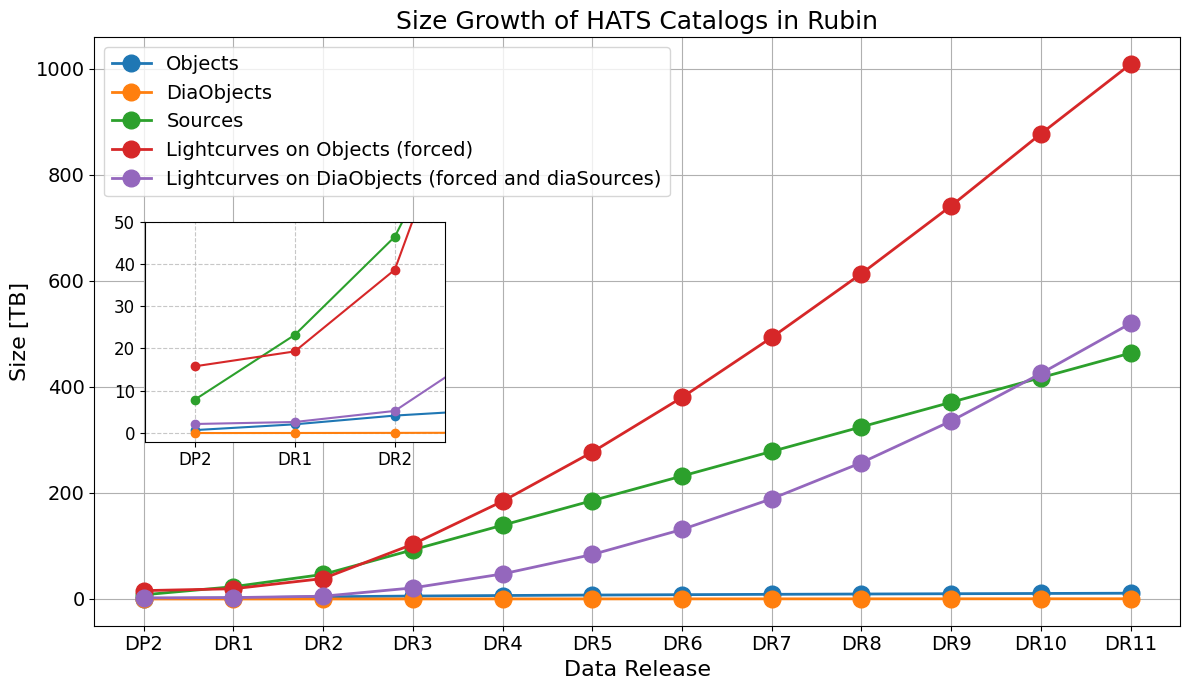

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 7))
x = np.arange(0, 12, 1)

# Main plot
plt.plot(x, array_of_size_obj, marker='o', ms=12, lw=2, label='Objects')
plt.plot(x, array_of_size_diaobj, marker='o', ms=12, lw=2, label='DiaObjects')
plt.plot(x, array_of_size_src, marker='o', ms=12, lw=2, label='Sources')
plt.plot(x, array_of_size_lc_obj, marker='o', ms=12, lw=2, label='Lightcurves on Objects (forced)')
plt.plot(x, array_of_size_lc_diaobj, marker='o', ms=12, lw=2, label='Lightcurves on DiaObjects (forced and diaSources)')

# Axis labels and title
plt.xlabel("Data Release", fontsize=16)
plt.ylabel("Size [TB]", fontsize=16)
plt.title("Size Growth of HATS Catalogs in Rubin", fontsize=18)

# X-tick labels
release_labels = ["DP2"] + [f"DR{i}" for i in range(1, 12)]
plt.xticks(ticks=x, labels=release_labels, fontsize=14)
plt.yticks(fontsize=14)

# Legend and layout
plt.legend(fontsize=14)
plt.grid(True)

# Inset axes
ax_inset = inset_axes(plt.gca(),
                      width=3, height=2.2,  # inches
                      loc='center left',
                      bbox_to_anchor=(0.04, 0.5),  # shift toward center
                      bbox_transform=plt.gca().transAxes)

# Plot same data in inset
ax_inset.plot(x, array_of_size_obj, marker='o', ms=6, lw=1.5)
ax_inset.plot(x, array_of_size_diaobj, marker='o', ms=6, lw=1.5)
ax_inset.plot(x, array_of_size_src, marker='o', ms=6, lw=1.5)
ax_inset.plot(x, array_of_size_lc_obj, marker='o', ms=6, lw=1.5)
ax_inset.plot(x, array_of_size_lc_diaobj, marker='o', ms=6, lw=1.5)

# Zoomed-in limits
ax_inset.set_xlim(-0.5, 2.5)
ax_inset.set_ylim(-2, 50)

# Set custom ticks
ax_inset.set_xticks(ticks=x[:3])
ax_inset.set_xticklabels(release_labels[:3], fontsize=12)
ax_inset.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax_inset.tick_params(labelsize=12)

# Add grid to inset
ax_inset.grid(True, linestyle='--', alpha=0.7)
# ax_inset.set_title("Zoom In", fontsize=10)

plt.tight_layout()
plt.show()

In [36]:
# total number of measurments of forced sources 
(40 * 10**9 * 825*1.5)  /10**12 

49.5

In [38]:
(40 * 10**9 * 825*1.5)/(268*10**6) * 0.0052

960.4477611940298

In [34]:
(268*10**6)

268000000

In [33]:
184701*5/1000

923.505

In [18]:
# object_lc

obj_lc_file_name = "/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0_rc5/object_lc/dataset/Norder=6/Dir=20000/Npix=20692.parquet"
obj_lc_parquet_file = pq.ParquetFile(obj_lc_file_name)

obj_lc_cols = obj_lc_parquet_file.metadata.num_columns
obj_lc_sizes = np.zeros(obj_lc_cols)
row_groups = obj_lc_parquet_file.metadata.num_row_groups
obj_lc_lens = np.zeros(obj_lc_cols)

for rg in range(row_groups):
    for col in range(obj_lc_cols):
        obj_lc_sizes[col] += (
            obj_lc_parquet_file.metadata.row_group(rg).column(col).total_compressed_size
        )
        obj_lc_lens[col] += (
            obj_lc_parquet_file.metadata.row_group(rg).column(col).num_values
        )

first_row_group = obj_lc_parquet_file.metadata.row_group(0)

column_names = [
    first_row_group.column(col).path_in_schema.removesuffix(".list.element")
    for col in range(0, first_row_group.num_columns)
]

column_types = [
    first_row_group.column(col).physical_type
    for col in range(0, first_row_group.num_columns)
]
obj_lc_frame = pd.DataFrame({"name": column_names,
                             "size": obj_lc_sizes, 
                             "length": obj_lc_lens,
                            "type": column_types})
obj_lc_frame["percent"] = obj_lc_frame["size"] / obj_lc_frame["size"].sum() * 100
obj_lc_frame["density"] = obj_lc_frame["size"] / obj_lc_frame["length"]
obj_lc_frame = obj_lc_frame.sort_values("density", ascending=False)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 200)
obj_lc_frame

,name,size,length,type,percent,density
11,coord_ra,681141.0,67245.0,DOUBLE,0.471510,10.129244
12,coord_dec,681132.0,67245.0,DOUBLE,0.471504,10.129110
4,x,625300.0,67245.0,DOUBLE,0.432855,9.298833
5,y,622546.0,67245.0,DOUBLE,0.430949,9.257878
103,_healpix_29,617415.0,67245.0,INT64,0.427397,9.181575
0,objectId,426817.0,67245.0,INT64,0.295458,6.347193
1,refFwhm,410255.0,67245.0,FLOAT,0.283993,6.100900
6,xErr,408729.0,67245.0,FLOAT,0.282937,6.078207
7,yErr,408669.0,67245.0,FLOAT,0.282895,6.077314
13,coord_raErr,408616.0,67245.0,FLOAT,0.282859,6.076526


In [19]:
# dia object_lc

obj_lc_file_name = "/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0_rc5/dia_object_lc/dataset/Norder=6/Dir=20000/Npix=20692.parquet"
obj_lc_parquet_file = pq.ParquetFile(obj_lc_file_name)

obj_lc_cols = obj_lc_parquet_file.metadata.num_columns
obj_lc_sizes = np.zeros(obj_lc_cols)
row_groups = obj_lc_parquet_file.metadata.num_row_groups
obj_lc_lens = np.zeros(obj_lc_cols)

for rg in range(row_groups):
    for col in range(obj_lc_cols):
        obj_lc_sizes[col] += (
            obj_lc_parquet_file.metadata.row_group(rg).column(col).total_compressed_size
        )
        obj_lc_lens[col] += (
            obj_lc_parquet_file.metadata.row_group(rg).column(col).num_values
        )

first_row_group = obj_lc_parquet_file.metadata.row_group(0)

column_names = [
    first_row_group.column(col).path_in_schema.removesuffix(".list.element")
    for col in range(0, first_row_group.num_columns)
]

column_types = [
    first_row_group.column(col).physical_type
    for col in range(0, first_row_group.num_columns)
]
obj_lc_frame = pd.DataFrame({"name": column_names,
                             "size": obj_lc_sizes, 
                             "length": obj_lc_lens,
                            "type": column_types})
obj_lc_frame["percent"] = obj_lc_frame["size"] / obj_lc_frame["size"].sum() * 100
obj_lc_frame["density"] = obj_lc_frame["size"] / obj_lc_frame["length"]
obj_lc_frame = obj_lc_frame.sort_values("density", ascending=False)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 200)
obj_lc_frame

,name,size,length,type,percent,density
15,diaSource.dec,929936.0,92259.0,DOUBLE,0.718585,10.079624
1,ra,321855.0,32574.0,DOUBLE,0.248705,9.880733
2,dec,321854.0,32574.0,DOUBLE,0.248705,9.880702
20,diaSource.y,903783.0,92259.0,DOUBLE,0.698376,9.796150
19,diaSource.x,902295.0,92259.0,DOUBLE,0.697226,9.780021
14,diaSource.ra,894294.0,92259.0,DOUBLE,0.691043,9.693298
128,_healpix_29,303400.0,32574.0,INT64,0.234445,9.314177
91,diaSource.diaSourceId,645156.0,92259.0,INT64,0.498528,6.992879
0,diaObjectId,203410.0,32574.0,INT64,0.157180,6.244551
23,diaSource.apFlux,575989.0,92259.0,FLOAT,0.445081,6.243174


In [20]:
# source

obj_lc_file_name = "/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0_rc5/source/dataset/Norder=5/Dir=0/Npix=8328.parquet"
obj_lc_parquet_file = pq.ParquetFile(obj_lc_file_name)

obj_lc_cols = obj_lc_parquet_file.metadata.num_columns
obj_lc_sizes = np.zeros(obj_lc_cols)
row_groups = obj_lc_parquet_file.metadata.num_row_groups
obj_lc_lens = np.zeros(obj_lc_cols)

for rg in range(row_groups):
    for col in range(obj_lc_cols):
        obj_lc_sizes[col] += (
            obj_lc_parquet_file.metadata.row_group(rg).column(col).total_compressed_size
        )
        obj_lc_lens[col] += (
            obj_lc_parquet_file.metadata.row_group(rg).column(col).num_values
        )

first_row_group = obj_lc_parquet_file.metadata.row_group(0)

column_names = [
    first_row_group.column(col).path_in_schema.removesuffix(".list.element")
    for col in range(0, first_row_group.num_columns)
]

column_types = [
    first_row_group.column(col).physical_type
    for col in range(0, first_row_group.num_columns)
]
obj_lc_frame = pd.DataFrame({"name": column_names,
                             "size": obj_lc_sizes, 
                             "length": obj_lc_lens,
                            "type": column_types})
obj_lc_frame["percent"] = obj_lc_frame["size"] / obj_lc_frame["size"].sum() * 100
obj_lc_frame["density"] = obj_lc_frame["size"] / obj_lc_frame["length"]
obj_lc_frame = obj_lc_frame.sort_values("density", ascending=False)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 200)
obj_lc_frame

,name,size,length,type,percent,density
1,coord_ra,401984.0,40177.0,DOUBLE,2.340379,10.005326
8,ra,401984.0,40177.0,DOUBLE,2.340379,10.005326
2,coord_dec,388314.0,40177.0,DOUBLE,2.260791,9.665082
9,dec,388314.0,40177.0,DOUBLE,2.260791,9.665082
5,y,385758.0,40177.0,DOUBLE,2.245910,9.601464
4,x,385649.0,40177.0,DOUBLE,2.245276,9.598751
0,_healpix_29,332744.0,40177.0,INT64,1.937259,8.281952
156,sourceId,246349.0,40177.0,INT64,1.434261,6.131593
51,ixyPSF,241201.0,40177.0,FLOAT,1.404289,6.003460
18,ap06Flux,241193.0,40177.0,FLOAT,1.404243,6.003261


In [21]:
# object lc everything

from pathlib import Path
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 200)

base_path = Path("/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0_rc5/object_lc/dataset/")
parquet_files = list(base_path.rglob("*.parquet"))

all_frames = []

for obj_lc_file_name in parquet_files:
    try:
        obj_lc_parquet_file = pq.ParquetFile(obj_lc_file_name)

        obj_lc_cols = obj_lc_parquet_file.metadata.num_columns
        obj_lc_sizes = np.zeros(obj_lc_cols)
        obj_lc_lens = np.zeros(obj_lc_cols)
        row_groups = obj_lc_parquet_file.metadata.num_row_groups

        for rg in range(row_groups):
            for col in range(obj_lc_cols):
                column = obj_lc_parquet_file.metadata.row_group(rg).column(col)
                obj_lc_sizes[col] += column.total_compressed_size
                obj_lc_lens[col] += column.num_values

        first_row_group = obj_lc_parquet_file.metadata.row_group(0)

        column_names = [
            first_row_group.column(col).path_in_schema.removesuffix(".list.element")
            for col in range(first_row_group.num_columns)
        ]
        column_types = [
            first_row_group.column(col).physical_type
            for col in range(first_row_group.num_columns)
        ]

        obj_lc_frame = pd.DataFrame({
            "name": column_names,
            "size": obj_lc_sizes,
            "length": obj_lc_lens,
            "type": column_types,
            "file": str(obj_lc_file_name)
        })
        obj_lc_frame["percent"] = obj_lc_frame["size"] / obj_lc_frame["size"].sum() * 100
        obj_lc_frame["density"] = obj_lc_frame["size"] / obj_lc_frame["length"]

        all_frames.append(obj_lc_frame)

    except Exception as e:
        print(f"Failed to process {obj_lc_file_name}: {e}")

# Combine everything into a single DataFrame
full_df = pd.concat(all_frames, ignore_index=True)

# Example: aggregate statistics across all files
summary = full_df.groupby("name").agg({
    "size": "sum",
    "length": "sum",
    "density": "mean",  # or sum/mean depending on what you want
    "type": "first"
})
summary["percent"] = summary["size"] / summary["size"].sum() * 100
summary = summary.sort_values("density", ascending=False)

In [22]:
summary

,size,length,density,type,percent
name,,,,,
coord_dec,2.250488e+07,2284295.0,9.897137,DOUBLE,0.267501
coord_ra,2.248954e+07,2284295.0,9.895779,DOUBLE,0.267318
x,2.160431e+07,2284295.0,9.515846,DOUBLE,0.256796
y,2.157009e+07,2284295.0,9.493953,DOUBLE,0.256390
_healpix_29,2.037860e+07,2284295.0,8.995903,INT64,0.242227
objectId,1.382682e+07,2284295.0,6.100714,INT64,0.164350
refFwhm,1.378872e+07,2284295.0,5.905848,FLOAT,0.163898
xErr,1.381511e+07,2284295.0,5.856720,FLOAT,0.164211
yErr,1.381497e+07,2284295.0,5.856573,FLOAT,0.164210


In [23]:
# dia_object lc everything

from pathlib import Path
import pyarrow.parquet as pq
import numpy as np
import pandas as pd

# Base directory to search
base_path = Path("/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0_rc5/dia_object_lc/dataset/")
parquet_files = list(base_path.rglob("*.parquet"))

# Collect results from each file
all_frames = []

for obj_lc_file_name in parquet_files:
    try:
        obj_lc_parquet_file = pq.ParquetFile(obj_lc_file_name)

        obj_lc_cols = obj_lc_parquet_file.metadata.num_columns
        obj_lc_sizes = np.zeros(obj_lc_cols)
        obj_lc_lens = np.zeros(obj_lc_cols)
        row_groups = obj_lc_parquet_file.metadata.num_row_groups

        for rg in range(row_groups):
            for col in range(obj_lc_cols):
                column = obj_lc_parquet_file.metadata.row_group(rg).column(col)
                obj_lc_sizes[col] += column.total_compressed_size
                obj_lc_lens[col] += column.num_values

        first_row_group = obj_lc_parquet_file.metadata.row_group(0)

        column_names = [
            first_row_group.column(col).path_in_schema.removesuffix(".list.element")
            for col in range(first_row_group.num_columns)
        ]
        column_types = [
            first_row_group.column(col).physical_type
            for col in range(first_row_group.num_columns)
        ]

        obj_lc_frame = pd.DataFrame({
            "name": column_names,
            "size": obj_lc_sizes,
            "length": obj_lc_lens,
            "type": column_types,
            "file": str(obj_lc_file_name)
        })
        obj_lc_frame["percent"] = obj_lc_frame["size"] / obj_lc_frame["size"].sum() * 100
        obj_lc_frame["density"] = obj_lc_frame["size"] / obj_lc_frame["length"]

        all_frames.append(obj_lc_frame)

    except Exception as e:
        print(f"Failed to process {obj_lc_file_name}: {e}")

# Combine all results into one DataFrame
full_df = pd.concat(all_frames, ignore_index=True)

# Optional: aggregate by column name
summary = full_df.groupby("name").agg({
    "size": "sum",
    "length": "sum",
    "density": "mean",  # Or another aggregation if needed
    "type": "first"
}).reset_index()

summary["percent"] = summary["size"] / summary["size"].sum() * 100
summary = summary.sort_values("density", ascending=False)

# Show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 200)

summary

,name,size,length,density,type,percent
1,dec,1.055637e+07,1093215.0,11.521225,DOUBLE,0.167239
126,ra,1.055636e+07,1093215.0,11.519635,DOUBLE,0.167238
43,diaSource.dec,2.800505e+07,3080577.0,11.497914,DOUBLE,0.443668
98,diaSource.ra,2.803158e+07,3080577.0,11.384296,DOUBLE,0.444088
121,diaSource.x,2.662950e+07,3080577.0,11.088231,DOUBLE,0.421876
123,diaSource.y,2.662131e+07,3080577.0,11.084283,DOUBLE,0.421746
0,_healpix_29,9.712285e+06,1093215.0,10.892720,INT64,0.153866
46,diaSource.diaSourceId,1.887266e+07,3080577.0,8.789188,INT64,0.298989
33,diaObjectId,6.556960e+06,1093215.0,8.139573,INT64,0.103878
34,diaSource.apFlux,1.795591e+07,3080577.0,7.536530,FLOAT,0.284465


In [24]:
# source everything

from pathlib import Path
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 200)

base_path = Path("/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0_rc5/source/dataset/")
parquet_files = list(base_path.rglob("*.parquet"))

all_frames = []

for obj_lc_file_name in parquet_files:
    try:
        obj_lc_parquet_file = pq.ParquetFile(obj_lc_file_name)

        obj_lc_cols = obj_lc_parquet_file.metadata.num_columns
        obj_lc_sizes = np.zeros(obj_lc_cols)
        obj_lc_lens = np.zeros(obj_lc_cols)
        row_groups = obj_lc_parquet_file.metadata.num_row_groups

        for rg in range(row_groups):
            for col in range(obj_lc_cols):
                column = obj_lc_parquet_file.metadata.row_group(rg).column(col)
                obj_lc_sizes[col] += column.total_compressed_size
                obj_lc_lens[col] += column.num_values

        first_row_group = obj_lc_parquet_file.metadata.row_group(0)

        column_names = [
            first_row_group.column(col).path_in_schema.removesuffix(".list.element")
            for col in range(first_row_group.num_columns)
        ]
        column_types = [
            first_row_group.column(col).physical_type
            for col in range(first_row_group.num_columns)
        ]

        obj_lc_frame = pd.DataFrame({
            "name": column_names,
            "size": obj_lc_sizes,
            "length": obj_lc_lens,
            "type": column_types,
            "file": str(obj_lc_file_name)
        })
        obj_lc_frame["percent"] = obj_lc_frame["size"] / obj_lc_frame["size"].sum() * 100
        obj_lc_frame["density"] = obj_lc_frame["size"] / obj_lc_frame["length"]

        all_frames.append(obj_lc_frame)

    except Exception as e:
        print(f"Failed to process {obj_lc_file_name}: {e}")

# Combine everything into a single DataFrame
full_df = pd.concat(all_frames, ignore_index=True)

# Example: aggregate statistics across all files
summary = full_df.groupby("name").agg({
    "size": "sum",
    "length": "sum",
    "density": "mean",  # or sum/mean depending on what you want
    "type": "first"
})
summary["percent"] = summary["size"] / summary["size"].sum() * 100
summary = summary.sort_values("density", ascending=False)

In [25]:
summary

,size,length,density,type,percent
name,,,,,
x,374018270.0,45564446.0,9.231424,DOUBLE,2.192850
y,373990989.0,45564446.0,9.231063,DOUBLE,2.192690
coord_dec,357351201.0,45564446.0,9.098455,DOUBLE,2.095132
dec,357351201.0,45564446.0,9.098455,DOUBLE,2.095132
coord_ra,354551534.0,45564446.0,9.063851,DOUBLE,2.078717
ra,354551534.0,45564446.0,9.063851,DOUBLE,2.078717
_healpix_29,274873969.0,45564446.0,7.370812,INT64,1.611572
sourceId,249311387.0,45564446.0,6.511971,INT64,1.461700
sky,240849267.0,45564446.0,6.186512,FLOAT,1.412087


In [26]:
# old

multiply = np.array([1, 710, 1500, 1500+1*3000, 1500+2*3000, 1500+3*3000, 1500+4*3000, 
            1500+5*3000, 1500+6*3000, 1500+7*3000, 1500+8*3000, 1500+9.5*3000])
baseline = 5.9+7.9

A_result = baseline * 0.8* 0.7 * multiply / 1024
B_result = baseline * 0.7 * multiply / 1024
baseline_result = baseline * multiply / 1024
C_result = baseline  * multiply *1.17 / 1024
D_result= baseline * multiply * 2.16 / 1024 
E_result = baseline * multiply * 2.50 / 1024 +baseline *multiply * 0.25 * np.array([0,0,  0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 10]) / 1024

In [27]:
# DP2 starts April 15, ends September 01
# DP2 assume to have scientific observing of 30 days of 10 hours, 30 of 8 hours, 30 days of 6 hours, 30 days of 4 hours, 15 days of 2 hours
# all togehter like having 87 full nights (10 hours per night)
# cloud fraction = 0.3
# 87 * 0.7 = 61 full nights of data
# 900*61*189 = 10376100
# lets add factor 1.1 to be more conservative
# 10376100 * 1.1 = 11413710
# that is 710 times more data than DP1 

# DR1 runs from Sep 01 to March 01 2026
# DR1 will have 183 full days
# 183 *0.7 * 900 * 189 = 21789810
# lets add factor 1.1 to be more conservative
# 19484010.0 * 1.1 = 23968791.0
# that is 1490 times more data than DP1 exposures
# lets call it 1500


# DR2 runs from March 01 2026 to March 01 2027
# DR2 will have 366 full days
# double from DR1
# that is 3000 times more data than DP1 exposures
# cumulative that is 4500x more than DP1 exposures (DR1 + DR2)

# continue for higher DRx

# assume 20% better compression + removing columns 0.7 * 0.8
# assume removing 12 float columns (e.g., removing magnitudes)*0.7
# baseline estimate
# assume adding 2 float columns in forced lightcurves *1.17
# baseline estimate with sources added * 2.16
# baseline estimate with extra data  * 2.50 + 0.25*t